--**MAKİNA ÖĞRENMESİ FİNAL PROJESİ**--

**ÖĞRENCİNİN ADI: AYŞE ZİŞAN ŞAHİN**

**OKUL NUMARASI: 22040301132**

**BÖLÜM : YAZILIM MÜHENDİSLİĞİ**

**ÖĞRETİM ELEMANI: GÖKALP TULUM**


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [23]:
# Veri setini yükleyelim
data = pd.read_csv('diabetes.csv')

In [24]:

# Sütun adlarını düzenleyelim
data.columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]

In [25]:
# Eksik değerleri kontrol edelim
print(data.isnull().sum())

# Eksik değerleri doldurma veya çıkarma
# Pima Indians Diabetes veri setinde eksik değerler genellikle 0 olarak kodlanmıştır
# Bu nedenle, 0 değerlerini eksik olarak değerlendirelim
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [26]:
# Eksik değerleri ortalama ile dolduralım
data.fillna(data.mean(), inplace=True)

# Temizlenmiş veri setini kontrol edelim
print(data.isnull().sum())
print(data.head())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [27]:
# Veri setini eğitim ve test olarak bölelim
X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes Sınıflandırıcı
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Sonuçları raporlama
print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Confusion Matrix:
[[119  32]
 [ 28  52]]

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



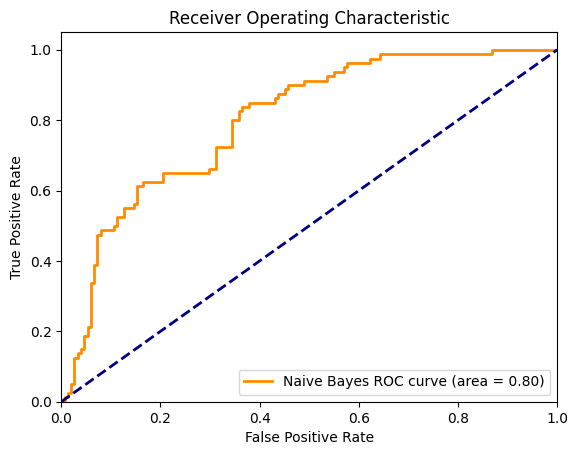

In [28]:
# ROC Eğrisi ve AUC
y_pred_prob_nb = nb_model.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure()
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='Naive Bayes ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Best Parameters for KNN: {'n_neighbors': 24}
KNN Confusion Matrix:
[[127  24]
 [ 41  39]]

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       151
           1       0.62      0.49      0.55        80

    accuracy                           0.72       231
   macro avg       0.69      0.66      0.67       231
weighted avg       0.71      0.72      0.71       231



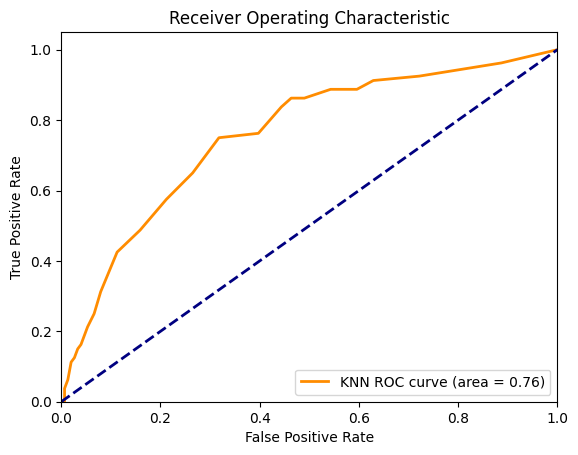

In [29]:
# K-Nearest Neighbors (KNN)
param_grid = {'n_neighbors': np.arange(1, 25)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

print("Best Parameters for KNN:", knn_cv.best_params_)

knn_best = knn_cv.best_estimator_
y_pred_knn = knn_best.predict(X_test)

print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

y_pred_prob_knn = knn_best.predict_proba(X_test)[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='KNN ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

MLP Confusion Matrix:
[[123  28]
 [ 35  45]]

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       151
           1       0.62      0.56      0.59        80

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.69       231
weighted avg       0.72      0.73      0.72       231

SVM Confusion Matrix:
[[130  21]
 [ 42  38]]

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.80       151
           1       0.64      0.47      0.55        80

    accuracy                           0.73       231
   macro avg       0.70      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231



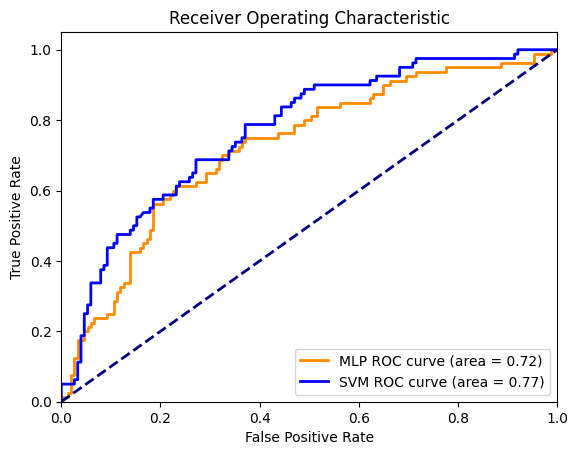

In [30]:
# Multi-Layer Perceptron (MLP) ve Support Vector Machines (SVM)
mlp = MLPClassifier(random_state=42, max_iter=300)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("MLP Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))
print("\nMLP Classification Report:")
print(classification_report(y_test, y_pred_mlp))

y_pred_prob_mlp = mlp.predict_proba(X_test)[:,1]
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_pred_prob_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

y_pred_prob_svm = svm.predict_proba(X_test)[:,1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure()
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label='MLP ROC curve (area = %0.2f)' % roc_auc_mlp)
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label='SVM ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()